# Implementation 

After working with individual elements with respect to the displacement of their nodes, the next step is to assemble a global matrix from contributions of every element. For this example the problem above is divided into three equal elements of $1$ meter. To stay organized we give each element and node a number. As you can see in the figure below, there are 4 nodes, numbered $n_0$ to $n_3$ and 3 elements numbered $e_0$ to $e_2$.

```{figure} .././images/Chapter1/1_2_2.png
---
height: 200px
name: 1_2_2
---
One dimensional multielement bar
```

In the physical interpretation of solving mechanical equilibrium in a bar, we can interpret the result of the product $\mathbf{K}_e\mathbf{u}$ as forces coming from the element. Using the "local" stiffness formulation as shown above we can acquire the forces exerted on a node by an element as a function of the displacement. We will in this example have four nodes and therefore four unknowns. Let us consider the forces excerted by the second element ($e2$):

$$
\left[\begin{matrix}f_1^{e2} \\ f_2^{e2} \\ f_3^{e2} \\ f_4^{e2}\end{matrix}\right] = \frac{EA}{\Delta x}\left[\begin{matrix}0 & 0 & 0 & 0 \\ 0 & 1 & -1 & 0 \\ 0 & -1 & 1 & 0 \\ 0 & 0 & 0 & 0 \end{matrix}\right] \left[\begin{matrix}u_1 \\ u_2 \\ u_3 \\ u_4\end{matrix}\right]
$$ (element2)

It follows logically that the other elements also excert forces on our nodes. By a simple addition of the influences of each element we can find the total stiffness matrix of our problem:


$$
\left[\begin{matrix}f_1 \\ f_2 \\ f_3 \\ f_4\end{matrix}\right] = \left[\begin{matrix}f_1^{e1} \\ f_2^{e1} \\ f_3^{e1} \\ f_4^{e1}\end{matrix}\right] + \left[\begin{matrix}f_1^{e2} \\ f_2^{e2} \\ f_3^{e2} \\ f_4^{e2}\end{matrix}\right] + \left[\begin{matrix}f_1^{e3} \\ f_2^{e3} \\ f_3^{e3} \\ f_4^{e3}\end{matrix}\right] = \frac{EA}{\Delta x} \left(\left[\begin{matrix}1 & -1 & 0 & 0 \\ -1 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \end{matrix}\right] + \left[\begin{matrix}0 & 0 & 0 & 0 \\ 0 & 1 & -1 & 0 \\ 0 & -1 & 1 & 0 \\ 0 & 0 & 0 & 0 \end{matrix}\right] + \left[\begin{matrix}0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & -1 \\ 0 & 0 & -1 & 1 \end{matrix}\right] \right) \left[\begin{matrix}u_1 \\ u_2 \\ u_3 \\ u_4\end{matrix}\right]
$$ (assembly)

Collection of the matrices gives:

$$
\left[\begin{matrix}f_1 \\ f_2 \\ f_3 \\ f_4\end{matrix}\right] = \frac{EA}{\Delta x}\left[\begin{matrix}1 & -1 & 0 & 0 \\ -1 & 2 & -1 & 0 \\ 0 & -1 & 2 & -1 \\ 0 & 0 & -1 & 1 \end{matrix}\right] \left[\begin{matrix}u_1 \\ u_2 \\ u_3 \\ u_4\end{matrix}\right]
$$ (sumofmatrixes)

To solve for global equilibrium, we need to equate the product $\mathbf{Ku}$ to a vector with external forces. Point loads on a node can directly be inserted on the right hand side vector of the equation $\mathbf{Ku}=\mathbf{f}$, while a distributed load $q$ is translated to a load vector with the expression from the derivation:

$$
\mathbf{f}=\int_0^L\mathbf{N}^Tq\,dx
$$ (distributedload)

## Boundary conditions

We derived a way to express the relation between $\mathbf{u}$ and $\mathbf{f}$ through a matrix $\mathbf{K}$. However, when we try to solve the equation $\mathbf{K u} = \mathbf{f}$, we will run into a problem. On the left hand side one of the values for $u$ is already known, the displacement of the left node ($n_0$) will be zero. The corresponding force $f_1$ is as of yet unknown. Since there is unknowns on either side of the equation we cannot solve it by inverting K and bringing it to the other side.

$$
\frac{EA}{\Delta x}\left[\begin{matrix}1 & -1 & 0 & 0 \\ -1 & 2 & -1 & 0 \\ 0 & -1 & 2 & -1 \\ 0 & 0 & -1 & 1 \end{matrix}\right] \left[\begin{matrix}0 \\ u_2? \\ u_3? \\ u_4?\end{matrix}\right] = \left[\begin{matrix}f_1? \\ 0 \\ 0 \\ 10\end{matrix}\right]
$$ (totalmatrix)

A way to overcome this problem is to leave out equations belonging to nodes for which the solution is known. As long as the fixed degrees of freedom are prescribed at a value of 0 (i.e. homogeneous Dirichlet conditions), we can do this by simply removing the corresponding columns and rows out of our system. Doing that for node 0 in our example, we get:

$$
\frac{EA}{\Delta x}\left[\begin{matrix} 2 & -1 & 0 \\ -1 & 2 & -1 \\ 0 & -1 & 1 \end{matrix}\right] \left[\begin{matrix}u_2? \\ u_3? \\ u_4?\end{matrix}\right] = \left[\begin{matrix}0 \\ 0 \\ 10\end{matrix}\right]
$$ (totalmatrix_afterbcs)

This system can solved, by inverting $\mathbf{K}$, or more efficiently by using an appropriate linear solver. It is important to note that for nonzero Dirichlet conditions, additional steps need to be taken.

Solving the system of equations above will finally result in a vector with values for the nodal displacements $\mathbf{u}$. Note that with the shape functions, we also have an interpolation between the nodes, so a continuous approximate solution $u^h(x)$ can be obtained with:

$$
u^h(x) = \mathbf{N}\mathbf{u}
$$ (continuoussolution)

Moreover, the reaction force $f_1$ can be computed by multiplying the complete $4\times4$-matrix with the nodal displacement vector.

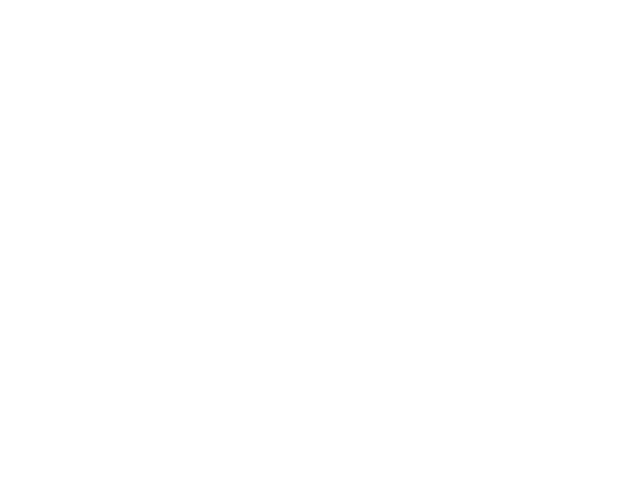

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import plotly.subplots as sp
import plotly.graph_objects as go

plt.figure()
plt.rcParams.update({'font.size': 12, 'lines.linewidth': 2})

In [2]:
import numpy as np




def elastic_rod(total_length, EA, num_nodes, force):

    # Define element length
    element_length = total_length / (num_nodes - 1)

    # Assemble local stiffness matrix
    k_local = (EA / element_length) * np.array([[1, -1], [-1, 1]])

    # Assemble global stiffness matrix (for simplicity, assume one element)
    K_global = np.zeros((num_nodes, num_nodes))

    for i in range(num_nodes - 1):
        K_global[i:i+2, i:i+2] += k_local

    # Define boundary conditions (left side set to zero displacement)
    bc_nodes = [0]

    # Apply boundary conditions
    for i in bc_nodes:
        K_global[i, :] = 0
        K_global[:, i] = 0
        K_global[i, i] = 1

    # Define external forces (for example, f[3] = 10)
    external_forces = np.zeros(num_nodes)
    external_forces[-1] = force

    # Solve the system of equations Ku = f
    u = np.linalg.solve(K_global, external_forces)
    return u

ds = elastic_rod(total_length = 3.0, EA = 1.0, num_nodes = 20, force = 20)
import numpy as np
import matplotlib.pyplot as plt

# Returns the evaluated N vector
# - The local coordinate of evaluation "x_local"
# - The element size "dx"
def evaluate_N(x_local, dx):
    return [1-x_local/dx, x_local/dx]
    

# Returning the stiffness matrix of a single element
# - The node to the left of the element "n_left"
# - The node to the right of the element "n_right"
# - The total number of nodes/DOFs in the system "n_DOF"
# - The stiffness of the bar "EA"
# - The length of an element "dx"
def get_element_matrix(n_left, n_right, n_DOF, EA, dx):
    # Creating a matrix with the required size
    B = np.zeros((1,n_DOF))    # Defining in 2 dimensions is nessecary for transpose
    B[0,n_left] = -1/dx
    B[0,n_right] = 1/dx    
    
    # Defining integration locations and weights
    integration_locations = [(dx - dx/(3**0.5))/2, (dx + dx/(3**0.5))/2]
    integration_weights = [dx/2, dx/2]
    
    # Setting up the local elementstiffness matrix
    K_loc = np.zeros((n_DOF, n_DOF))
    
    for i in range(2):
        K_loc += np.dot(np.transpose(B), EA*B)*integration_weights[i]

    return K_loc
# Returns the global K matrix of a bar (EA and dx not included)
# - The length of the bar "bar_length"
# - The number of elements "n_el"
# - The stiffness of the bar "EA"
def assemble_global_K_bar(bar_length, n_el, EA):
    n_DOF = n_el+1
    dx = bar_length/n_el
    # Creating a zero-filled matrix which will be filled with the local contributions
    K_global = np.zeros((n_DOF, n_DOF))
    
    for i in range(n_el):
        # Get the contribution of the element which lies between node i and node i+1
        K_global += get_element_matrix(i, i+1, n_DOF, EA, dx)
    
    return K_global

# Returns the global f vector with continous forces on a bar
# - The length of the bar "bar_length"
# - The number of elements "n_el"
# - The force on the bar "EA"
def assemble_global_f_bar(bar_length, n_el, q):
    n_DOF = n_el+1
    dx = bar_length/n_el
    # Creating a zero-filled vector which will be filled with the local contributions
    f_global = np.zeros((n_DOF))
    
    for i in range(n_el):
        # Get the contribution of the element which lies between node i and node i+1
        f_global[i] += (q*dx)/2
        f_global[i+1] += (q*dx)/2
    
    return f_global
def simulate(n_element):
    length = 3          # Length in meters (m)
    EA = 1e3            # Stiffness EA (kN)
    n_node = n_element + 1         # Number of nodes
    F_right = 10        # Load applied at the right boundary
    u_left = 0          # Displacement at the left boundary
    q_load = -10        #distibuted load (kN/m)



    dx = length/n_element
    x = np.linspace(0,length,n_node)

    K = assemble_global_K_bar(length, n_element, EA)
    K_inv = np.linalg.inv(K[1:n_node, 1:n_node])

    # Assemble f with the continuous forces
    f = assemble_global_f_bar(length, n_element, q_load)

    # Add boundary conditions to f
    f[n_node-1] += F_right

    # Initialize vector u with displacements
    u = np.zeros(n_node)

    # Solve the system
    u[1:n_node] = np.dot(K_inv, f[1:n_node])

    x_analytical = np.linspace(0, length, 1000)
    u_analytical = -(q_load * ((x_analytical - length)**2 - length**2)) / (2 * EA) + (F_right / EA) * x_analytical


    return x, u, x_analytical, u_analytical



import plotly.graph_objects as go
import numpy as np

# Colors
grey = '#eeeeee' # light grey fill

## Prepare all the graphs that are to be plotted
# Define the range of densities to plot
range_elements = np.arange(1, 9, 1)

## Create plot
fig = go.Figure()

base_traces = 0 # Number of traces that are always visible

# Add traces, one for each slider step
for a in range_elements: 
    x, u, x_analytical, u_analytical  = simulate(a)
    fig.add_trace(  
        go.Scatter(
            visible=False,
            x=x_analytical,
            y=u_analytical,
            line=dict(color='#FFA500'),
            mode='lines',
            name='Exact solution'))
    fig.add_trace(        
        go.Scatter(
            visible=False,
            x=x,
            y=u,
            line=dict(color='#6a8ba4'),
            mode='lines',
            name='Numerical solution'))

traces_per_step = 2 # Number of traces per value of a

# Show the traces for one value of a when loading the plot (initial setup)
active_a_index = 1
for i in range(traces_per_step):
    curr_idx = int(base_traces + active_a_index*traces_per_step + i)
    fig.data[curr_idx].visible = True

# Create and add slider
steps = []
for i in range(0, range_elements.shape[0]):
    visarray = [False] * len(fig.data)
    visarray[0:base_traces] = [True] * base_traces
    curr_idx = int(base_traces + i * traces_per_step)
    next_idx = int(base_traces + (i+1) * traces_per_step)
    visarray[curr_idx:next_idx] = [True] * traces_per_step
    step = dict(
        method="update",
        args=[{"visible": visarray}],
        label=str(round(range_elements[i], 1))
    )
    steps.append(step)

sliders = [dict(
    active=active_a_index,
    currentvalue={"prefix": r"Number of elements: "},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    legend_title="Legend",
)

fig.update_xaxes(title_text='x (m)', range=[-0.1, 3.1])

# Update yaxis properties
fig.update_yaxes(title_text='u (m)', range=[-0.025, 0.005])

fig.update_layout(
    title="Displacement of axially loaded rod",
    sliders=sliders,
    legend_title="Legend"
)

fig